In [1]:
import os
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib import rcParams
from astropy import constants as const
import glob
from image_plotting import image_ra_dec
from image_plotting import fit_image_plotting
import required_functions as rf
from turbo_colormap import turbo_cmap

# alternative to tight layout
rcParams.update({'figure.autolayout': True})
plt.ion()

muh2=2.8										# [amu]					
kappa0 = 10.
h,k,c,mh = const.h.cgs , const.k_B.cgs , const.c.cgs, const.m_p.cgs*1.00794
h,k,c,mh = h.value, k.value, c.value, mh.value	# [erg.s], [erg/K], [cm/s], [g]

%matplotlib inline
%matplotlib notebook


In [89]:

main_folder = '/Volumes/Storm/Research_has_all_data/colden_project/'
field = 'Taurus'

os.system('mkdir {0}Mosaic/{1}'.format(main_folder, field))
planck_name = 'TauLL'
names = ['TauFill',
'TauL1489',
'TauL1517',
'TauL1521',
'TauL1539',
'TauL1544',
'TauL1551',
'TauS1',
'TauS2',
'TauS3',
'TauT3',
'TauTMC',
'TauTMC_E']

print (planck_name, names)

# Get all the file names

planck_orig_tau = main_folder+'Planck/{0}_HFI_CompMap_ThermalDustModel_0_TAN.fits'.format(planck_name)
planck_orig_temp = main_folder+'Planck/{0}_HFI_CompMap_ThermalDustModel_4_TAN.fits'.format(planck_name)
planck_orig_beta = main_folder+'Planck/{0}_HFI_CompMap_ThermalDustModel_6_TAN.fits'.format(planck_name)

planck_160 = main_folder+'Models/{0}_HFI_Model_160.fits'.format(planck_name)
planck_160_resamp = main_folder+'mosaic/{1}/{0}_HFI_Model_160.resamp.fits'.format(planck_name, field)
planck_250 = main_folder+'Models/{0}_HFI_Model_250.fits'.format(planck_name)
planck_250_resamp = main_folder+'mosaic/{1}/{0}_HFI_Model_250.resamp.fits'.format(planck_name, field)
planck_350 = main_folder+'Models/{0}_HFI_Model_350.fits'.format(planck_name)
planck_350_resamp = main_folder+'mosaic/{1}/{0}_HFI_Model_350.resamp.fits'.format(planck_name, field)
planck_500 = main_folder+'Models/{0}_HFI_Model_500.fits'.format(planck_name)
planck_500_resamp = main_folder+'mosaic/{1}/{0}_HFI_Model_500.resamp.fits'.format(planck_name, field)

planck_tau_n = main_folder+'mosaic/{1}/{0}_tau.fits'.format(planck_name, field)
planck_temp_n = main_folder+'mosaic/{1}/{0}_temp.fits'.format(planck_name, field)
planck_colden_n = main_folder+'mosaic/{1}/{0}_colden.fits'.format(planck_name, field)

planck_tau_resamp = main_folder+'mosaic/{1}/{0}_tau.resamp.fits'.format(planck_name, field)
planck_temp_resamp = main_folder+'mosaic/{1}/{0}_temp.resamp.fits'.format(planck_name, field)
planck_colden_resamp = main_folder+'mosaic/{1}/{0}_colden.resamp.fits'.format(planck_name, field)

template_name = main_folder+'mosaic/{0}/{0}_template.fits'.format(field)

data_160_mosaic = main_folder+'mosaic/{0}/{0}_160_mosaic.fits'.format(field)
data_160_combined = main_folder+'mosaic/{0}/{0}_160_combined.fits'.format(field)
data_250_mosaic = main_folder+'mosaic/{0}/{0}_250_mosaic.fits'.format(field)
data_250_combined = main_folder+'mosaic/{0}/{0}_250_combined.fits'.format(field)
data_350_mosaic = main_folder+'mosaic/{0}/{0}_350_mosaic.fits'.format(field)
data_350_combined = main_folder+'mosaic/{0}/{0}_350_combined.fits'.format(field)
data_500_mosaic = main_folder+'mosaic/{0}/{0}_500_mosaic.fits'.format(field)
data_500_combined = main_folder+'mosaic/{0}/{0}_500_combined.fits'.format(field)

grid_mosaic = main_folder+'mosaic/{0}/{0}_grid.fits'.format(field)
grid_outline = main_folder+'mosaic/{0}/{0}_outline.fits'.format(field)

tau_mosaic = main_folder+'mosaic/{0}/{0}_tau_mosaic.fits'.format(field)
tau_combined = main_folder+'mosaic/{0}/{0}_tau_combined.fits'.format(field)
temp_mosaic = main_folder+'mosaic/{0}/{0}_temp_mosaic.fits'.format(field)
temp_combined = main_folder+'mosaic/{0}/{0}_temp_combined.fits'.format(field)
colden_mosaic = main_folder+'mosaic/{0}/{0}_colden_mosaic.fits'.format(field)
colden_combined = main_folder+'mosaic/{0}/{0}_colden_combined.fits'.format(field)


grid_names = []
data_160_names = [] 
data_250_names = []
data_350_names = []
data_500_names = []
tau_names = []
temp_names = []
colden_names = []

suffix = '_wt_offset'

for i in names:
    a = glob.glob(main_folder+'herschel_data/{0}/{0}*160.offset.conv.resamp.fits'.format(i))
    b = glob.glob(main_folder+'herschel_data/{0}/{0}*250.offset.conv.resamp.fits'.format(i))
    c = glob.glob(main_folder+'herschel_data/{0}/{0}*350.offset.conv.resamp.fits'.format(i))
    d = glob.glob(main_folder+'herschel_data/{0}/{0}*500.offset.fits'.format(i))
    g = glob.glob(main_folder+'grid/{0}_500.fits'.format(i))
    x = glob.glob(main_folder+'tau_temp/{0}{1}/{0}_masked/{0}_tau1THz*.fits'.format(i, suffix))
    y = glob.glob(main_folder+'tau_temp/{0}{1}/{0}_masked/{0}_dustTemperature*.fits'.format(i, suffix))
    z = glob.glob(main_folder+'tau_temp/{0}{1}/{0}_masked/{0}_H2columnDensity*.fits'.format(i, suffix))
    
    data_160_names.append(a[0])
    data_250_names.append(b[0])
    data_350_names.append(c[0])
    data_500_names.append(d[0])
    tau_names.append(x[0])
    temp_names.append(y[0])
    colden_names.append(z[0])
    
    grid_names.append(g[0])
    
print (main_folder+'mosaic/{1}/{0}_HFI_Model_160.resamp.fits'.format(planck_name, field))

planck_tau, head = fits.getdata(planck_orig_tau, header = True)
temp = fits.getdata(planck_orig_temp)
beta = fits.getdata(planck_orig_beta)
Tau = planck_tau/((353.e9/1000.e9)**beta)
CD = planck_tau/(muh2 * mh * (kappa0 / 100.) * ((353.e9/1000.e9)**beta))

os.system("rm {0}".format(planck_tau_n))
fits.writeto(planck_tau_n, Tau , head)

os.system("rm {0}".format(planck_temp_n))
fits.writeto(planck_temp_n, temp , head)

os.system("rm {0}".format(planck_colden_n))
fits.writeto(planck_colden_n, CD , head)

TauLL ['TauFill', 'TauL1489', 'TauL1517', 'TauL1521', 'TauL1539', 'TauL1544', 'TauL1551', 'TauS1', 'TauS2', 'TauS3', 'TauT3', 'TauTMC', 'TauTMC_E']
/Volumes/Storm/Research_has_all_data/colden_project/mosaic/Taurus/TauLL_HFI_Model_160.resamp.fits


In [37]:
# get the template map
planck_temp, head = fits.getdata(planck_orig_temp, header = True)

factor = abs(head['CDELT1']*3600/14)
factor_int = int(factor)

head['NAXIS1'] =(int(np.shape(planck_temp)[1]*factor)+1)
head['NAXIS2'] =(int(np.shape(planck_temp)[0]*factor)+1)

template = np.zeros([head['NAXIS2'],head['NAXIS1']])

head['CRPIX1'] =(int(np.shape(planck_temp)[1]*factor/2))
head['CRPIX2'] =(int(np.shape(planck_temp)[0]*factor/2))
head['FIELD'] = (field, 'Name of the field')
head['CDELT1'] = (head['CDELT1']/factor)
head['CDELT2'] = (head['CDELT2']/factor)

try: 
    head.remove(keyword='BUNIT')
    head.remove(keyword='BTYPE')
    head.remove(keyword='TELESCOP')
except:
    print

os.system("rm {0}".format(template_name))
fits.writeto(template_name, template , head)

# regrid planck
os.system("rm {0}".format(planck_160_resamp))
rf.regrid(planck_160,template_name, resultimage = planck_160_resamp , header = None)

os.system("rm {0}".format(planck_250_resamp))
rf.regrid(planck_250,template_name, resultimage = planck_250_resamp , header = None)

os.system("rm {0}".format(planck_350_resamp))
rf.regrid(planck_350,template_name, resultimage = planck_350_resamp , header = None)

os.system("rm {0}".format(planck_500_resamp))
rf.regrid(planck_500,template_name, resultimage = planck_500_resamp , header = None)

os.system("rm {0}".format(planck_tau_resamp_n))
rf.regrid(planck_tau_n,template_name, resultimage = planck_tau_resamp_n , header = None)

os.system("rm {0}".format(planck_temp_resamp_n))
rf.regrid(planck_temp_n,template_name, resultimage = planck_temp_resamp_n , header = None)

os.system("rm {0}".format(planck_colden_resamp_n))
rf.regrid(planck_colden_n,template_name, resultimage = planck_colden_resamp_n , header = None)

Regridded in  0:03:32.899993
Wavelength is not given in the header
File Saved as: /Volumes/Storm/Research_has_all_data/colden_project/mosaic/Taurus/TauLL_colden.resamp.fits
Regriding done. File is saved. 



In [26]:
# load template 

template, head = fits.getdata(template_name, header = True)

x = np.shape(template)[0]
y = np.shape(template)[1]

file_num = len(data_250_names)

data_160 = np.zeros([file_num, x, y])
data_250 = np.zeros([file_num, x, y])
data_350 = np.zeros([file_num, x, y])
data_500 = np.zeros([file_num, x, y])
result_tau = np.zeros([file_num, x, y])
result_temp = np.zeros([file_num, x, y])
result_colden = np.zeros([file_num, x, y])
grid = np.zeros([file_num, x, y])

# load data files and the grid
print ('loading the data files plus grid')
for i in range(file_num):
    print (i+1, 'of', file_num)

    print (data_160_names[i])
    #os.system("rm {0}".format(data_160_names[i][:-5]+'.resamp.fits'))
    #rf.regrid(data_160_names[i],template_name, resultimage = 'same' , header = None)
    data_160[i]= fits.getdata(data_160_names[i][:-5]+'.resamp.fits')

    print (data_250_names[i])
    #os.system("rm {0}".format(data_250_names[i][:-5]+'.resamp.fits'))
    #rf.regrid(data_250_names[i],template_name, resultimage = 'same' , header = None)
    data_250[i]= fits.getdata(data_250_names[i][:-5]+'.resamp.fits')

    print (data_350_names[i])
    #os.system("rm {0}".format(data_350_names[i][:-5]+'.resamp.fits'))
    #rf.regrid(data_350_names[i],template_name, resultimage = 'same' , header = None)
    data_350[i]= fits.getdata(data_350_names[i][:-5]+'.resamp.fits')

    print (data_500_names[i])
    #os.system("rm {0}".format(data_500_names[i][:-5]+'.resamp.fits'))
    #rf.regrid(data_500_names[i],template_name, resultimage = 'same' , header = None)
    data_500[i]= fits.getdata(data_500_names[i][:-5]+'.resamp.fits')
    
    print (tau_names[i])
    #os.system("rm {0}".format(tau_names[i][:-5]+'.resamp.fits'))
    #rf.regrid(tau_names[i],template_name, resultimage = 'same' , header = None)
    result_tau[i]= fits.getdata(tau_names[i][:-5]+'.resamp.fits')

    print (temp_names[i])
    #os.system("rm {0}".format(temp_names[i][:-5]+'.resamp.fits'))
    #rf.regrid(temp_names[i],template_name, resultimage = 'same' , header = None)
    result_temp[i]= fits.getdata(temp_names[i][:-5]+'.resamp.fits')
    
    print (colden_names[i])
    #os.system("rm {0}".format(colden_names[i][:-5]+'.resamp.fits'))
    #rf.regrid(colden_names[i],template_name, resultimage = 'same' , header = None)
    result_colden[i]= fits.getdata(colden_names[i][:-5]+'.resamp.fits')

    print (grid_names[i])
    #os.system("rm {0}".format(grid_names[i][:-5]+'.resamp.fits'))
    #rf.regrid(grid_names[i],template_name, resultimage = 'same' , header = None)
    grid[i] = fits.getdata(grid_names[i][:-5]+'.resamp.fits')


grid[grid <= 0.9] = float('nan')
grid[grid >= 1.1] = float('nan')
grid[grid <1.1] = 1.
grid[grid >0.9] = 1.

data_160_masked = data_160/grid
data_250_masked = data_250/grid
data_350_masked = data_350/grid
data_500_masked = data_500/grid
tau_masked = result_tau/grid
temp_masked = result_temp/grid
colden_masked = result_colden/grid
print ('done masking')


loading the data files plus grid
1 of 13
/Volumes/Storm/Research_has_all_data/colden_project/herschel_data/TauFill/TauFill-160.offset.conv.resamp.fits
/Volumes/Storm/Research_has_all_data/colden_project/herschel_data/TauFill/TauFill-250.offset.conv.resamp.fits
/Volumes/Storm/Research_has_all_data/colden_project/herschel_data/TauFill/TauFill-350.offset.conv.resamp.fits
/Volumes/Storm/Research_has_all_data/colden_project/herschel_data/TauFill/TauFill-500.offset.fits
/Volumes/Storm/Research_has_all_data/colden_project/tau_temp/TauFill_wt_offset/TauFill_masked/TauFill_tau1THz_36.4_reso_masked.fits
/Volumes/Storm/Research_has_all_data/colden_project/tau_temp/TauFill_wt_offset/TauFill_masked/TauFill_dustTemperature_36.4_reso_masked.fits
/Volumes/Storm/Research_has_all_data/colden_project/tau_temp/TauFill_wt_offset/TauFill_masked/TauFill_H2columnDensity_36.4_reso_masked.fits
/Volumes/Storm/Research_has_all_data/colden_project/grid/TauFill_500.fits
2 of 13
/Volumes/Storm/Research_has_all_data/

/Volumes/Storm/Research_has_all_data/colden_project/grid/TauS2_500.fits
10 of 13
/Volumes/Storm/Research_has_all_data/colden_project/herschel_data/TauS3/TauS3-160.offset.conv.resamp.fits
/Volumes/Storm/Research_has_all_data/colden_project/herschel_data/TauS3/TauS3-250.offset.conv.resamp.fits
/Volumes/Storm/Research_has_all_data/colden_project/herschel_data/TauS3/TauS3-350.offset.conv.resamp.fits
/Volumes/Storm/Research_has_all_data/colden_project/herschel_data/TauS3/TauS3-500.offset.fits
/Volumes/Storm/Research_has_all_data/colden_project/tau_temp/TauS3_wt_offset/TauS3_masked/TauS3_tau1THz_36.4_reso_masked.fits
/Volumes/Storm/Research_has_all_data/colden_project/tau_temp/TauS3_wt_offset/TauS3_masked/TauS3_dustTemperature_36.4_reso_masked.fits
/Volumes/Storm/Research_has_all_data/colden_project/tau_temp/TauS3_wt_offset/TauS3_masked/TauS3_H2columnDensity_36.4_reso_masked.fits
/Volumes/Storm/Research_has_all_data/colden_project/grid/TauS3_500.fits
11 of 13
/Volumes/Storm/Research_has_all_

/Users/ayushisingh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:65: RuntimeWarning: invalid value encountered in less_equal
/Users/ayushisingh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:66: RuntimeWarning: invalid value encountered in greater_equal
/Users/ayushisingh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:67: RuntimeWarning: invalid value encountered in less
/Users/ayushisingh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:68: RuntimeWarning: invalid value encountered in greater


done masking


In [39]:

# create the herschel mosaic
data_160_m = np.nanmean(data_160_masked, axis=0)
os.system("rm {0}".format(data_160_mosaic))
fits.writeto(data_160_mosaic, data_160_m , head)

data_250_m = np.nanmean(data_250_masked, axis=0)
os.system("rm {0}".format(data_250_mosaic))
fits.writeto(data_250_mosaic, data_250_m , head)

data_350_m = np.nanmean(data_350_masked, axis=0)
os.system("rm {0}".format(data_350_mosaic))
fits.writeto(data_350_mosaic, data_350_m , head)

data_500_m = np.nanmean(data_500_masked, axis=0)
os.system("rm {0}".format(data_500_mosaic))
fits.writeto(data_500_mosaic, data_500_m , head)

grid_m = np.nanmean(grid, axis=0)
os.system("rm {0}".format(grid_mosaic))
fits.writeto(grid_mosaic, grid_m , head)

tau_m = np.nanmean(tau_masked, axis=0)
os.system("rm {0}".format(tau_mosaic))
fits.writeto(tau_mosaic, tau_m , head)

temp_m = np.nanmean(temp_masked, axis=0)
os.system("rm {0}".format(temp_mosaic))
fits.writeto(temp_mosaic, temp_m , head)

colden_m = np.nanmean(colden_masked, axis=0)
os.system("rm {0}".format(colden_mosaic))
fits.writeto(colden_mosaic, colden_m , head)

def mygrad(x): # return the absolute value of the gradient 
	diffx,diffy = np.gradient(x)
	return np.sqrt(diffx**2+diffy**2)

cloudmask_region = grid_m>0
edge_region= (mygrad(cloudmask_region.astype('float64'))>0)
edge = (edge_region.astype('float64'))
#edge[edge <=0] = float('nan')

fits.writeto(grid_outline, edge, head)

print ('mosaic maps created ')

x = np.shape(template)[0]
y = np.shape(template)[1]

# combine herschel mosaic with planck
planck_160 = fits.getdata(planck_160_resamp)
planck_250 = fits.getdata(planck_250_resamp)
planck_350 = fits.getdata(planck_350_resamp)
planck_500 = fits.getdata(planck_500_resamp)
planck_tau = fits.getdata(planck_tau_resamp)
planck_temp = fits.getdata(planck_temp_resamp)
planck_colden = fits.getdata(planck_colden_resamp)

print ('combining data')
combined_160 = np.zeros([x, y])
combined_250 = np.zeros([x, y])
combined_350 = np.zeros([x, y])
combined_500 = np.zeros([x, y])
combined_tau = np.zeros([x, y])
combined_temp = np.zeros([x, y])
combined_colden = np.zeros([x, y])

print (np.shape(planck_160))
for i in range(x):
    print (i+1, 'of total', x)
    for j in range(y):
        if np.isnan(data_250_m[i][j]) == True:
            combined_160[i][j] = planck_160[i][j]
            combined_250[i][j] = planck_250[i][j]
            combined_350[i][j] = planck_350[i][j]
            combined_500[i][j] = planck_500[i][j]
            combined_tau[i][j] = planck_tau[i][j]
            combined_temp[i][j] = planck_temp[i][j]
            combined_colden[i][j] = planck_colden[i][j]
            
        else:
            combined_160[i][j] = data_160_m[i][j]
            combined_250[i][j] = data_250_m[i][j]
            combined_350[i][j] = data_350_m[i][j]
            combined_500[i][j] = data_500_m[i][j]
            combined_tau[i][j] = tau_m[i][j]
            combined_temp[i][j] = temp_m[i][j]
            combined_colden[i][j] = colden_m[i][j]

os.system("rm {0}".format(data_160_combined))
fits.writeto(data_160_combined, combined_160 , head)  

os.system("rm {0}".format(data_250_combined))
fits.writeto(data_250_combined, combined_250 , head)  

os.system("rm {0}".format(data_350_combined))
fits.writeto(data_350_combined, combined_350 , head)  

os.system("rm {0}".format(data_500_combined))
fits.writeto(data_500_combined, combined_500 , head) 

os.system("rm {0}".format(tau_combined))
fits.writeto(tau_combined, combined_tau , head) 

os.system("rm {0}".format(temp_combined))
fits.writeto(temp_combined, combined_temp , head) 

os.system("rm {0}".format(colden_combined))
fits.writeto(colden_combined, combined_colden , head) 

print ("done")

mosaic maps created 
combining data
(3855, 5137)
1 of total 3855
2 of total 3855
3 of total 3855
4 of total 3855
5 of total 3855
6 of total 3855
7 of total 3855
8 of total 3855
9 of total 3855
10 of total 3855
11 of total 3855
12 of total 3855
13 of total 3855
14 of total 3855
15 of total 3855
16 of total 3855
17 of total 3855
18 of total 3855
19 of total 3855
20 of total 3855
21 of total 3855
22 of total 3855
23 of total 3855
24 of total 3855
25 of total 3855
26 of total 3855
27 of total 3855
28 of total 3855
29 of total 3855
30 of total 3855
31 of total 3855
32 of total 3855
33 of total 3855
34 of total 3855
35 of total 3855
36 of total 3855
37 of total 3855
38 of total 3855
39 of total 3855
40 of total 3855
41 of total 3855
42 of total 3855
43 of total 3855
44 of total 3855
45 of total 3855
46 of total 3855
47 of total 3855
48 of total 3855
49 of total 3855
50 of total 3855
51 of total 3855
52 of total 3855
53 of total 3855
54 of total 3855
55 of total 3855
56 of total 3855
57 of to

461 of total 3855
462 of total 3855
463 of total 3855
464 of total 3855
465 of total 3855
466 of total 3855
467 of total 3855
468 of total 3855
469 of total 3855
470 of total 3855
471 of total 3855
472 of total 3855
473 of total 3855
474 of total 3855
475 of total 3855
476 of total 3855
477 of total 3855
478 of total 3855
479 of total 3855
480 of total 3855
481 of total 3855
482 of total 3855
483 of total 3855
484 of total 3855
485 of total 3855
486 of total 3855
487 of total 3855
488 of total 3855
489 of total 3855
490 of total 3855
491 of total 3855
492 of total 3855
493 of total 3855
494 of total 3855
495 of total 3855
496 of total 3855
497 of total 3855
498 of total 3855
499 of total 3855
500 of total 3855
501 of total 3855
502 of total 3855
503 of total 3855
504 of total 3855
505 of total 3855
506 of total 3855
507 of total 3855
508 of total 3855
509 of total 3855
510 of total 3855
511 of total 3855
512 of total 3855
513 of total 3855
514 of total 3855
515 of total 3855
516 of tot

920 of total 3855
921 of total 3855
922 of total 3855
923 of total 3855
924 of total 3855
925 of total 3855
926 of total 3855
927 of total 3855
928 of total 3855
929 of total 3855
930 of total 3855
931 of total 3855
932 of total 3855
933 of total 3855
934 of total 3855
935 of total 3855
936 of total 3855
937 of total 3855
938 of total 3855
939 of total 3855
940 of total 3855
941 of total 3855
942 of total 3855
943 of total 3855
944 of total 3855
945 of total 3855
946 of total 3855
947 of total 3855
948 of total 3855
949 of total 3855
950 of total 3855
951 of total 3855
952 of total 3855
953 of total 3855
954 of total 3855
955 of total 3855
956 of total 3855
957 of total 3855
958 of total 3855
959 of total 3855
960 of total 3855
961 of total 3855
962 of total 3855
963 of total 3855
964 of total 3855
965 of total 3855
966 of total 3855
967 of total 3855
968 of total 3855
969 of total 3855
970 of total 3855
971 of total 3855
972 of total 3855
973 of total 3855
974 of total 3855
975 of tot

1359 of total 3855
1360 of total 3855
1361 of total 3855
1362 of total 3855
1363 of total 3855
1364 of total 3855
1365 of total 3855
1366 of total 3855
1367 of total 3855
1368 of total 3855
1369 of total 3855
1370 of total 3855
1371 of total 3855
1372 of total 3855
1373 of total 3855
1374 of total 3855
1375 of total 3855
1376 of total 3855
1377 of total 3855
1378 of total 3855
1379 of total 3855
1380 of total 3855
1381 of total 3855
1382 of total 3855
1383 of total 3855
1384 of total 3855
1385 of total 3855
1386 of total 3855
1387 of total 3855
1388 of total 3855
1389 of total 3855
1390 of total 3855
1391 of total 3855
1392 of total 3855
1393 of total 3855
1394 of total 3855
1395 of total 3855
1396 of total 3855
1397 of total 3855
1398 of total 3855
1399 of total 3855
1400 of total 3855
1401 of total 3855
1402 of total 3855
1403 of total 3855
1404 of total 3855
1405 of total 3855
1406 of total 3855
1407 of total 3855
1408 of total 3855
1409 of total 3855
1410 of total 3855
1411 of tota

1793 of total 3855
1794 of total 3855
1795 of total 3855
1796 of total 3855
1797 of total 3855
1798 of total 3855
1799 of total 3855
1800 of total 3855
1801 of total 3855
1802 of total 3855
1803 of total 3855
1804 of total 3855
1805 of total 3855
1806 of total 3855
1807 of total 3855
1808 of total 3855
1809 of total 3855
1810 of total 3855
1811 of total 3855
1812 of total 3855
1813 of total 3855
1814 of total 3855
1815 of total 3855
1816 of total 3855
1817 of total 3855
1818 of total 3855
1819 of total 3855
1820 of total 3855
1821 of total 3855
1822 of total 3855
1823 of total 3855
1824 of total 3855
1825 of total 3855
1826 of total 3855
1827 of total 3855
1828 of total 3855
1829 of total 3855
1830 of total 3855
1831 of total 3855
1832 of total 3855
1833 of total 3855
1834 of total 3855
1835 of total 3855
1836 of total 3855
1837 of total 3855
1838 of total 3855
1839 of total 3855
1840 of total 3855
1841 of total 3855
1842 of total 3855
1843 of total 3855
1844 of total 3855
1845 of tota

2226 of total 3855
2227 of total 3855
2228 of total 3855
2229 of total 3855
2230 of total 3855
2231 of total 3855
2232 of total 3855
2233 of total 3855
2234 of total 3855
2235 of total 3855
2236 of total 3855
2237 of total 3855
2238 of total 3855
2239 of total 3855
2240 of total 3855
2241 of total 3855
2242 of total 3855
2243 of total 3855
2244 of total 3855
2245 of total 3855
2246 of total 3855
2247 of total 3855
2248 of total 3855
2249 of total 3855
2250 of total 3855
2251 of total 3855
2252 of total 3855
2253 of total 3855
2254 of total 3855
2255 of total 3855
2256 of total 3855
2257 of total 3855
2258 of total 3855
2259 of total 3855
2260 of total 3855
2261 of total 3855
2262 of total 3855
2263 of total 3855
2264 of total 3855
2265 of total 3855
2266 of total 3855
2267 of total 3855
2268 of total 3855
2269 of total 3855
2270 of total 3855
2271 of total 3855
2272 of total 3855
2273 of total 3855
2274 of total 3855
2275 of total 3855
2276 of total 3855
2277 of total 3855
2278 of tota

2659 of total 3855
2660 of total 3855
2661 of total 3855
2662 of total 3855
2663 of total 3855
2664 of total 3855
2665 of total 3855
2666 of total 3855
2667 of total 3855
2668 of total 3855
2669 of total 3855
2670 of total 3855
2671 of total 3855
2672 of total 3855
2673 of total 3855
2674 of total 3855
2675 of total 3855
2676 of total 3855
2677 of total 3855
2678 of total 3855
2679 of total 3855
2680 of total 3855
2681 of total 3855
2682 of total 3855
2683 of total 3855
2684 of total 3855
2685 of total 3855
2686 of total 3855
2687 of total 3855
2688 of total 3855
2689 of total 3855
2690 of total 3855
2691 of total 3855
2692 of total 3855
2693 of total 3855
2694 of total 3855
2695 of total 3855
2696 of total 3855
2697 of total 3855
2698 of total 3855
2699 of total 3855
2700 of total 3855
2701 of total 3855
2702 of total 3855
2703 of total 3855
2704 of total 3855
2705 of total 3855
2706 of total 3855
2707 of total 3855
2708 of total 3855
2709 of total 3855
2710 of total 3855
2711 of tota

3093 of total 3855
3094 of total 3855
3095 of total 3855
3096 of total 3855
3097 of total 3855
3098 of total 3855
3099 of total 3855
3100 of total 3855
3101 of total 3855
3102 of total 3855
3103 of total 3855
3104 of total 3855
3105 of total 3855
3106 of total 3855
3107 of total 3855
3108 of total 3855
3109 of total 3855
3110 of total 3855
3111 of total 3855
3112 of total 3855
3113 of total 3855
3114 of total 3855
3115 of total 3855
3116 of total 3855
3117 of total 3855
3118 of total 3855
3119 of total 3855
3120 of total 3855
3121 of total 3855
3122 of total 3855
3123 of total 3855
3124 of total 3855
3125 of total 3855
3126 of total 3855
3127 of total 3855
3128 of total 3855
3129 of total 3855
3130 of total 3855
3131 of total 3855
3132 of total 3855
3133 of total 3855
3134 of total 3855
3135 of total 3855
3136 of total 3855
3137 of total 3855
3138 of total 3855
3139 of total 3855
3140 of total 3855
3141 of total 3855
3142 of total 3855
3143 of total 3855
3144 of total 3855
3145 of tota

3527 of total 3855
3528 of total 3855
3529 of total 3855
3530 of total 3855
3531 of total 3855
3532 of total 3855
3533 of total 3855
3534 of total 3855
3535 of total 3855
3536 of total 3855
3537 of total 3855
3538 of total 3855
3539 of total 3855
3540 of total 3855
3541 of total 3855
3542 of total 3855
3543 of total 3855
3544 of total 3855
3545 of total 3855
3546 of total 3855
3547 of total 3855
3548 of total 3855
3549 of total 3855
3550 of total 3855
3551 of total 3855
3552 of total 3855
3553 of total 3855
3554 of total 3855
3555 of total 3855
3556 of total 3855
3557 of total 3855
3558 of total 3855
3559 of total 3855
3560 of total 3855
3561 of total 3855
3562 of total 3855
3563 of total 3855
3564 of total 3855
3565 of total 3855
3566 of total 3855
3567 of total 3855
3568 of total 3855
3569 of total 3855
3570 of total 3855
3571 of total 3855
3572 of total 3855
3573 of total 3855
3574 of total 3855
3575 of total 3855
3576 of total 3855
3577 of total 3855
3578 of total 3855
3579 of tota

In [2]:
main_folder = '/Volumes/Storm/Research_has_all_data/colden_project/'
#main_folder = '/mnt/raid-project/hp/asingh/colden_herschel/colden_project/'

suffix_folder = '_planck_wo_plane'
field = 'Aquila_Serpens'

values = {'Aquila_Serpens':{'length' : 9, 'height' : 6, 'vmax_160' : 700, 'vmax_250' : 500, 'vmax_350' : 350, 'vmax_500' : 200, 
                    'vmin_temp' : 10, 'vmax_temp' : 23, 'vmin_tau' : 0, 'vmax_tau' : 0.003, 'vmin_cd' : 1e20, 'vmax_cd' : 2e22},
          'Cepheus':{'length' : 9, 'height' : 6, 'vmax_160' : 150, 'vmax_250' : 120, 'vmax_350' : 80, 'vmax_500' : 30, 
                    'vmin_temp' : 10, 'vmax_temp' : 23, 'vmin_tau' : 0, 'vmax_tau' : 0.001, 'vmin_cd' : 1e20, 'vmax_cd' : 2e22},
          'Chameleon':{'length' : 9, 'height' : 6, 'vmax_160' : 150, 'vmax_250' : 120, 'vmax_350' : 80, 'vmax_500' : 30, 
                    'vmin_temp' : 10, 'vmax_temp' : 21, 'vmin_tau' : 0, 'vmax_tau' : 0.001, 'vmin_cd' : 8e19, 'vmax_cd' : 2e22},
          'Corona_Australis':{'length' : 9, 'height' : 6, 'vmax_160' : 150, 'vmax_250' : 120, 'vmax_350' : 80, 'vmax_500' : 30, 
                    'vmin_temp' : 10, 'vmax_temp' : 23, 'vmin_tau' : 0, 'vmax_tau' : 0.001, 'vmin_cd' : 8e19, 'vmax_cd' : 2e22},
          'Coalsack':{'length' : 9, 'height' : 6, 'vmax_160' : 700, 'vmax_250' : 500, 'vmax_350' : 350, 'vmax_500' : 200, 
                    'vmin_temp' : 10, 'vmax_temp' : 23, 'vmin_tau' : 0, 'vmax_tau' : 0.003, 'vmin_cd' : 2e20, 'vmax_cd' : 2e22},
          'IC5146':{'length' : 9, 'height' : 6, 'vmax_160' : 150, 'vmax_250' : 120, 'vmax_350' : 80, 'vmax_500' : 30, 
                    'vmin_temp' : 10, 'vmax_temp' : 25, 'vmin_tau' : 0, 'vmax_tau' : 0.001, 'vmin_cd' : 1e20, 'vmax_cd' : 2e22},
          'Lupus':{'length' : 9, 'height' : 6, 'vmax_160' : 150, 'vmax_250' : 120, 'vmax_350' : 80, 'vmax_500' : 30, 
                    'vmin_temp' : 10, 'vmax_temp' : 23, 'vmin_tau' : 0, 'vmax_tau' : 0.001, 'vmin_cd' : 1e20, 'vmax_cd' : 2e22},
          'Musca':{'length' : 9, 'height' : 6, 'vmax_160' : 150, 'vmax_250' : 120, 'vmax_350' : 80, 'vmax_500' : 30, 
                    'vmin_temp' : 10, 'vmax_temp' : 21, 'vmin_tau' : 0, 'vmax_tau' : 0.001, 'vmin_cd' : 1e20, 'vmax_cd' : 1e22},
          'Ophiuchus':{'length' : 9, 'height' : 6, 'vmax_160' : 200, 'vmax_250' : 170, 'vmax_350' : 80, 'vmax_500' : 30, 
                    'vmin_temp' : 10, 'vmax_temp' : 27, 'vmin_tau' : 0, 'vmax_tau' : 0.001, 'vmin_cd' : 1e20, 'vmax_cd' : 2e22},
          'Orion':{'length' : 9, 'height' : 6, 'vmax_160' : 150, 'vmax_250' : 120, 'vmax_350' : 80, 'vmax_500' : 30, 
                    'vmin_temp' : 10, 'vmax_temp' : 25, 'vmin_tau' : 0, 'vmax_tau' : 0.001, 'vmin_cd' : 1e20, 'vmax_cd' : 2e22},
          'Perseus':{'length' : 9, 'height' : 6, 'vmax_160' : 150, 'vmax_250' : 120, 'vmax_350' : 80, 'vmax_500' : 30, 
                    'vmin_temp' : 10, 'vmax_temp' : 23, 'vmin_tau' : 0, 'vmax_tau' : 0.001, 'vmin_cd' : 1e20, 'vmax_cd' : 2e22},
          'Pipe':{'length' : 9, 'height' : 6, 'vmax_160' : 200, 'vmax_250' : 170, 'vmax_350' : 100, 'vmax_500' : 30, 
                    'vmin_temp' : 10, 'vmax_temp' : 23, 'vmin_tau' : 0, 'vmax_tau' : 0.001, 'vmin_cd' : 1e20, 'vmax_cd' : 2e22},
          'Taurus':{'length' : 9, 'height' : 6, 'vmax_160' : 150, 'vmax_250' : 120, 'vmax_350' : 80, 'vmax_500' : 30, 
                    'vmin_temp' : 10, 'vmax_temp' : 20, 'vmin_tau' : 0, 'vmax_tau' : 0.001, 'vmin_cd' : 1e20, 'vmax_cd' : 2e22},
          'W3':{'length' : 9, 'height' : 6, 'vmax_160' : 700, 'vmax_250' : 500, 'vmax_350' : 350, 'vmax_500' : 200, 
                    'vmin_temp' : 10, 'vmax_temp' : 27, 'vmin_tau' : 0, 'vmax_tau' : 0.002, 'vmin_cd' : 3e20, 'vmax_cd' : 2e22},
          'W3_HOBYS':{'length' : 9, 'height' : 6, 'vmax_160' : 700, 'vmax_250' : 500, 'vmax_350' : 350, 'vmax_500' : 200, 
                    'vmin_temp' : 10, 'vmax_temp' : 27, 'vmin_tau' : 0, 'vmax_tau' : 0.002, 'vmin_cd' : 3e20, 'vmax_cd' : 2e22},
          'Spider':{'length' : 9, 'height' : 6, 'vmax_160' : 30, 'vmax_250' : 20, 'vmax_350' : 10, 'vmax_500' : 5, 
                    'vmin_temp' : 15, 'vmax_temp' : 23, 'vmin_tau' : 0, 'vmax_tau' : 0.0001, 'vmin_cd' : 1e19, 'vmax_cd' : 4e20},
         }

length = values[field]['length']
height = values[field]['height']
vmax_160 = values[field]['vmax_160']
vmax_250 = values[field]['vmax_250']
vmax_350 = values[field]['vmax_350']
vmax_500 = values[field]['vmax_500']
vmin_temp = values[field]['vmin_temp']
vmax_temp = values[field]['vmax_temp']
vmin_tau = values[field]['vmin_tau']
vmax_tau = values[field]['vmax_tau']
vmin_cd = values[field]['vmin_cd']
vmax_cd = values[field]['vmax_cd']




def fit_image_plotting(name, save_image = None, 
                       label = r'$N_{H_{2}}$ log$[cm^{-2}]$', 
                       VMIN = 20.45, VMAX = 22.5, CMAP = 'inferno', 
                       length = 12, height = 9, stretch = 'log', 
                       transparent= False, scalebar = True, scalebar_label = True,
                      contour= None, levels = 1, outline_color = 'white'):
    import aplpy
    fig = plt.figure(figsize=(length, height))
    f1  = aplpy.FITSFigure(name,figure=fig)
    
    f1.show_colorscale(cmap=CMAP,vmin=VMIN,vmax=VMAX, stretch=stretch) 
    
    if contour != None:
        f1.show_contour(contour,colors=outline_color, levels=levels)

    # tick coordinates
    f1.tick_labels.set_xformat("hh:mm")
    f1.tick_labels.set_yformat("dd")
    # axis labels
    
    f1.axis_labels.set_font(size=15)
    # tick labels
    f1.tick_labels.show()
    f1.tick_labels.set_font(size=15)
    # colour bar
    f1.add_colorbar()
    f1.colorbar.set_axis_label_text(label)
    f1.colorbar.set_axis_label_font(size=20)
    
    if scalebar:
        f1.add_scalebar(1.0,color="white",corner="top left")
        if scalebar_label:
            f1.scalebar.set_label("1 degree")
            f1.scalebar.set_font(size=20)
        plt.subplots_adjust(top = 1,bottom=0,right=1,left=0,hspace=0,wspace=0)
        fig.canvas.draw()
    if save_image == None:    
        f1.save(name.split(".fits")[0]+".png", transparent = transparent)
    else:
        f1.save(save_image, transparent = transparent)
    
    return()
    
field = field+suffix_folder   
data_160_mosaic = main_folder+'mosaic/{0}/{0}_160_mosaic.fits'.format(field)
data_160_combined = main_folder+'mosaic/{0}/{0}_160_combined.fits'.format(field)
data_250_mosaic = main_folder+'mosaic/{0}/{0}_250_mosaic.fits'.format(field)
data_250_combined = main_folder+'mosaic/{0}/{0}_250_combined.fits'.format(field)
data_350_mosaic = main_folder+'mosaic/{0}/{0}_350_mosaic.fits'.format(field)
data_350_combined = main_folder+'mosaic/{0}/{0}_350_combined.fits'.format(field)
data_500_mosaic = main_folder+'mosaic/{0}/{0}_500_mosaic.fits'.format(field)
data_500_combined = main_folder+'mosaic/{0}/{0}_500_combined.fits'.format(field)

grid_mosaic = main_folder+'mosaic/{0}/{0}_grid.fits'.format(field)
grid_outline = main_folder+'mosaic/{0}/{0}_outline.fits'.format(field)

tau_mosaic = main_folder+'mosaic/{0}/{0}_tau_mosaic.fits'.format(field)
tau_combined = main_folder+'mosaic/{0}/{0}_tau_combined.fits'.format(field)
temp_mosaic = main_folder+'mosaic/{0}/{0}_temp_mosaic.fits'.format(field)
temp_combined = main_folder+'mosaic/{0}/{0}_temp_combined.fits'.format(field)
colden_mosaic = main_folder+'mosaic/{0}/{0}_colden_mosaic.fits'.format(field)
colden_combined = main_folder+'mosaic/{0}/{0}_colden_combined.fits'.format(field)


/Users/ayushisingh/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:115: RuntimeWarning: invalid value encountered in less
  negative = result < 0.
/Users/ayushisingh/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:164: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):
/Users/ayushisingh/anaconda3/lib/python3.6/site-packages/aplpy/colorbar.py:138: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  tick.tick1On = True
/Users/ayushisingh/anaconda3/lib/python3.6/site-packages/aplpy/colorbar.py:139: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  tick.tick2On = True
/Users/ayushisingh/anaconda3/lib/python3.6/site-packages/aplpy/colorbar.py:140: Matplo

()

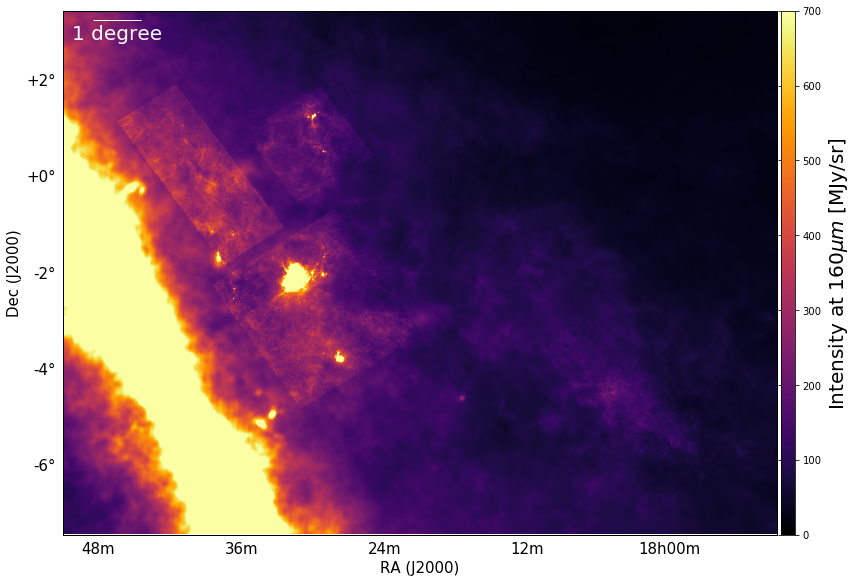

In [22]:
name = data_160_combined
fit_image_plotting(name, label = r"Intensity at 160$\mu m$ [MJy/sr]", 
             VMIN = 0, VMAX = vmax_160,length = length, height = height, stretch = 'linear')

()

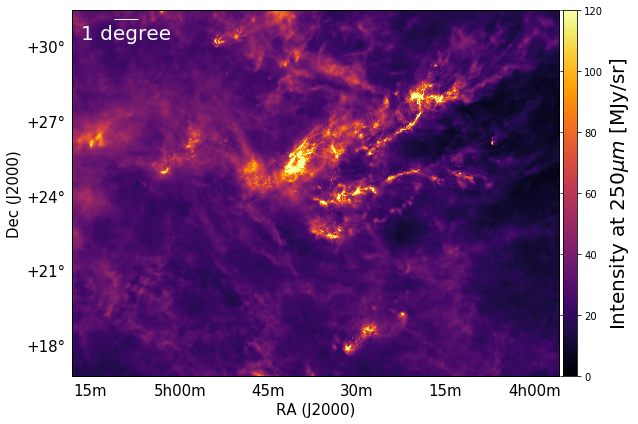

In [318]:
name = data_250_combined
fit_image_plotting(name, label = r"Intensity at 250$\mu m$ [MJy/sr]", 
             VMIN = 0, VMAX = vmax_250,length = length, height = height, stretch = 'linear')            

()

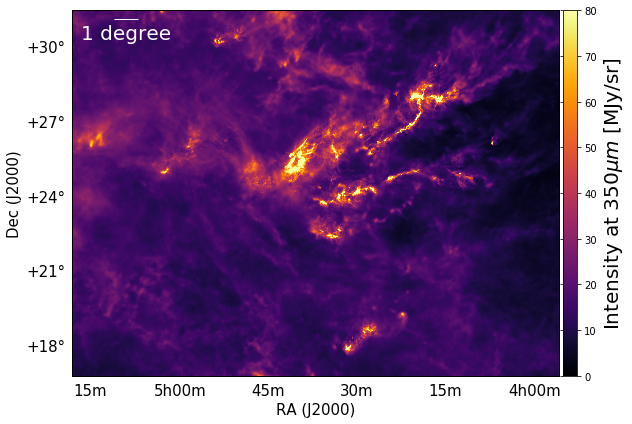

In [319]:
name = data_350_combined
fit_image_plotting(name, label = r"Intensity at 350$\mu m$ [MJy/sr]", 
             VMIN = 0, VMAX = vmax_350,length = length, height = height, stretch = 'linear')

()

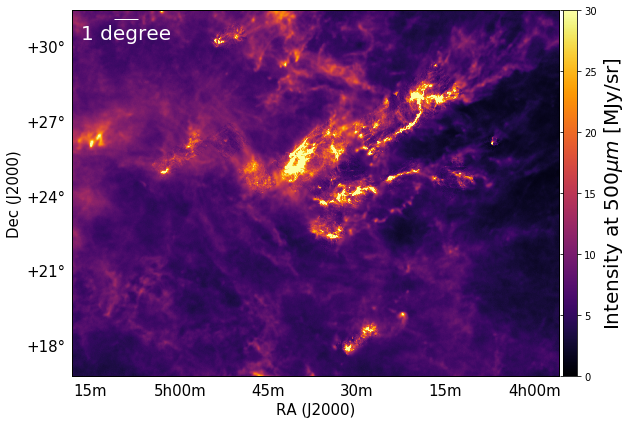

In [320]:

name = data_500_combined
fit_image_plotting(name, label = r"Intensity at 500$\mu m$ [MJy/sr]", 
             VMIN = 0, VMAX = vmax_500,length = length, height = height, stretch = 'linear')


()

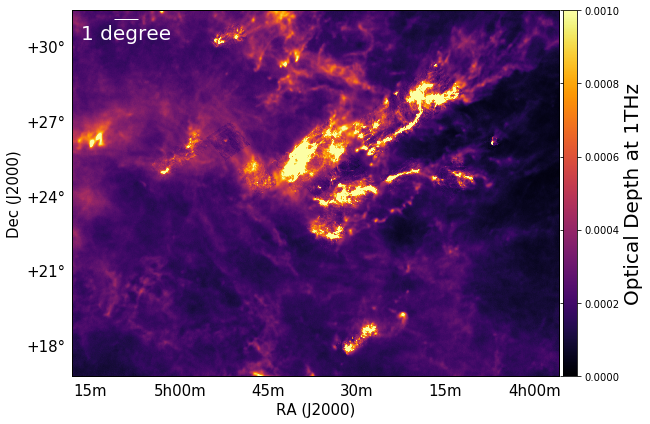

In [324]:

name = tau_combined
fit_image_plotting(name, label = r"Optical Depth at 1THz", 
             VMIN = vmin_tau, VMAX = vmax_tau,length = length, height = height, stretch = 'linear')


()

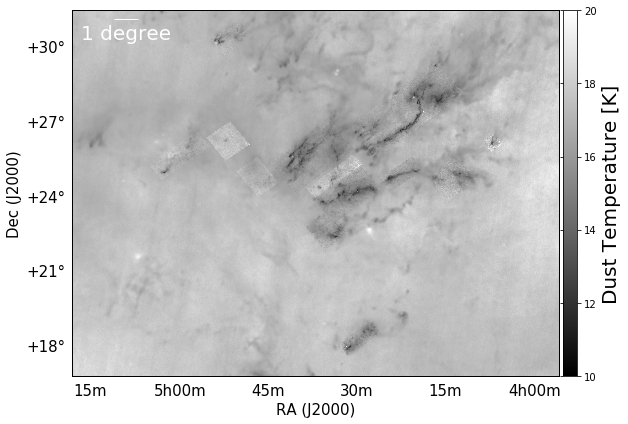

In [323]:
name = temp_combined
fit_image_plotting(name, label = r"Dust Temperature [K]", 
                   VMIN = vmin_temp, VMAX = vmax_temp, 
                   length = length, height = height,stretch = 'linear', CMAP = 'gray')


/Users/ayushisingh/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:115: RuntimeWarning: invalid value encountered in less
  negative = result < 0.


()

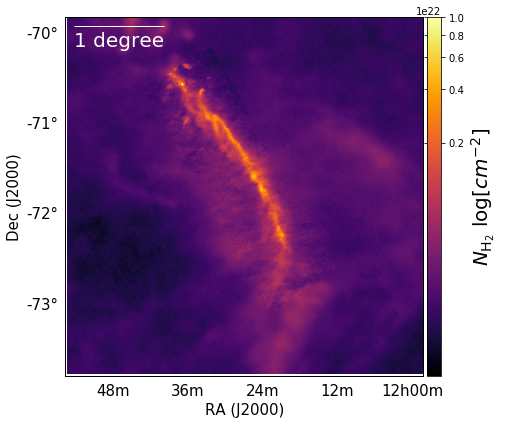

In [7]:
name = colden_combined
fit_image_plotting(name, label = r"$N_{\rm{H}_{2}}$ log$[cm^{-2}]$", 
             VMIN = vmin_cd, VMAX =vmax_cd,length = length, height = height, stretch = 'log', CMAP = 'inferno')

()

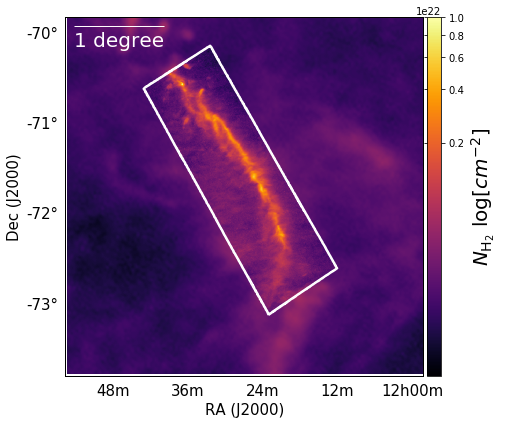

In [8]:
name = colden_combined
fit_image_plotting(name, label = r"$N_{\rm{H}_{2}}$ log$[cm^{-2}]$", save_image=name.split(".fits")[0]+"_outlined.png",
             VMIN = vmin_cd, VMAX =vmax_cd,length = length, height = height, stretch = 'log', CMAP = 'inferno', contour = grid_outline)    

()

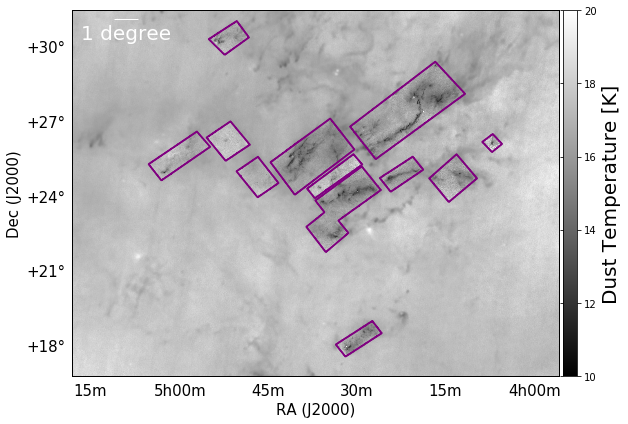

In [325]:
name = temp_combined
fit_image_plotting(name, label = r"Dust Temperature [K]", save_image=name.split(".fits")[0]+"_outlined.png",
                   VMIN = vmin_temp, VMAX = vmax_temp, 
                   length = length, height = height,stretch = 'linear', CMAP = 'gray', contour = grid_outline, outline_color = 'purple')

()

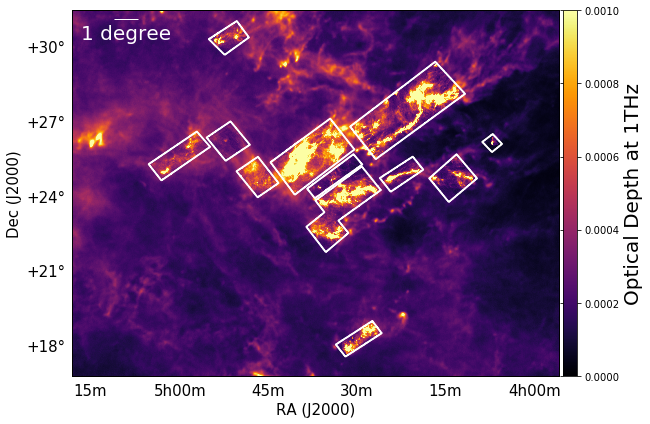

In [326]:
name = tau_combined
fit_image_plotting(name, label = r"Optical Depth at 1THz", save_image=name.split(".fits")[0]+"_outlined.png", 
             VMIN = vmin_tau, VMAX = vmax_tau,length = length, height = height, stretch = 'linear',contour = grid_outline)



/Users/ayushisingh/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:92: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):
/Users/ayushisingh/anaconda3/lib/python3.6/site-packages/aplpy/core.py:907: UserWarning: No contour levels were found within the data range.
  c = self._ax1.contour(image_contour, levels, extent=extent_contour, cmap=cmap, colors=colors, **kwargs)


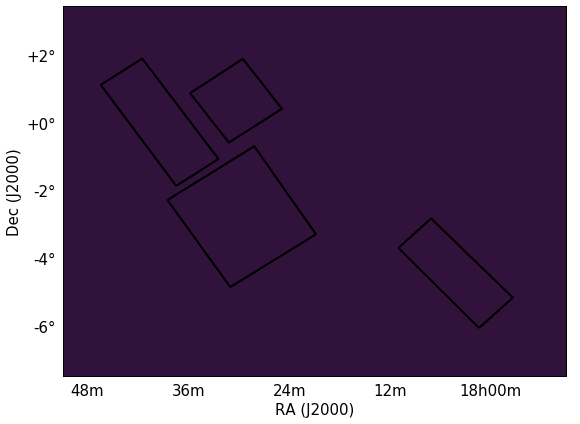